## Author Identification with Deep Learning

Using dataset from the Spooky Author Identification Competition on Kaggle: https://www.kaggle.com/c/spooky-author-identification/data?select=test.zip

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from nltk.tokenize import sent_tokenize,word_tokenize
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')
random_state = 7

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
train = pd.read_csv('/content/drive/My Drive/Author_identification/train.csv')
train.head()

,id,text,author
0,id26305,"This process, however, afforded me no means of...",EAP
1,id17569,It never once occurred to me that the fumbling...,HPL
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP
3,id27763,How lovely is spring As we looked from Windsor...,MWS
4,id12958,"Finding nothing else, not even gold, the Super...",HPL


In [ ]:
test = pd.read_csv('/content/drive/My Drive/Author_identification/test.csv')
test.head()

,id,text
0,id02310,"Still, as I urged our leaving Ireland with suc..."
1,id24541,"If a fire wanted fanning, it could readily be ..."
2,id00134,And when they had broken down the frail door t...
3,id27757,While I was thinking how I should possibly man...
4,id04081,I am not sure to what limit his knowledge may ...


In [ ]:
print(len(train), len(test))

19579 8392


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


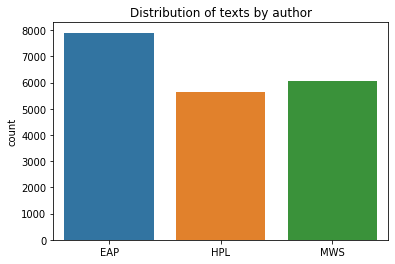

In [ ]:
ax = sns.countplot(list(train.author))
ax.set_title("Distribution of texts by author")
plt.show()

### Word distribution

In [ ]:
all_words = train['text'].str.split(expand=True).unstack().value_counts()

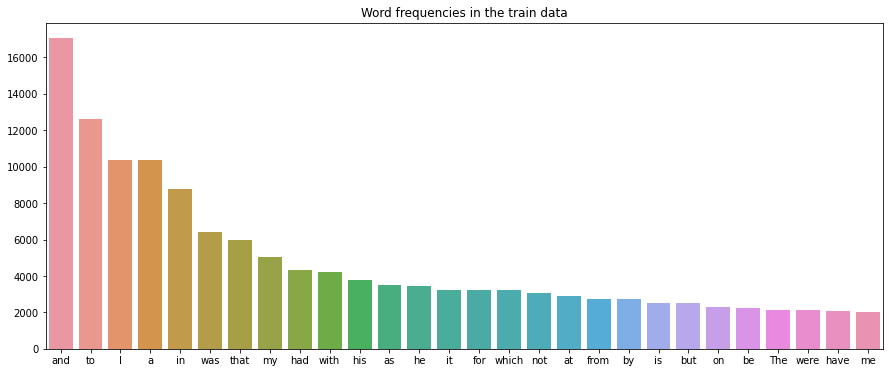

In [ ]:
plt.figure(figsize=(15,6))
g = sns.barplot(x = all_words.index.values[2:30],
            y = all_words.values[2:30])
g.set_title('Word frequencies in the train data')
plt.show()

### Wordcloud

In [ ]:
EAP = train[train['author']=='EAP']
MWS = train[train['author']=='MWS']
HPL = train[train['author']=='HPL']

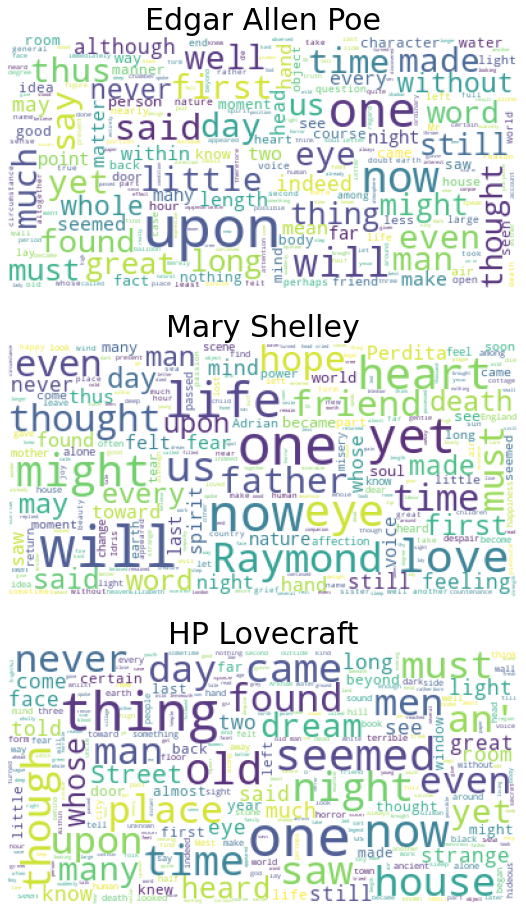

In [ ]:
plt.figure(figsize=(22,16))
plt.subplot(311)
wc = WordCloud(background_color="white", max_words=10000,
               stopwords=STOPWORDS, max_font_size= 45)

wc.generate(" ".join(EAP.text))
plt.title("Edgar Allen Poe", fontsize=30)
plt.imshow(wc.recolor( colormap= 'viridis' , random_state=4), alpha=0.9)
plt.axis('off')

plt.subplot(312)
wc.generate(" ".join(MWS.text))
plt.title("Mary Shelley", fontsize=30)
plt.imshow(wc.recolor( colormap= 'viridis' , random_state=4), alpha=0.9)
plt.axis('off')

plt.subplot(313)
wc.generate(" ".join(HPL.text))
plt.title("HP Lovecraft", fontsize=30)
plt.imshow(wc.recolor(colormap = 'viridis', random_state=4), alpha=0.9)
plt.axis('off')

plt.show()

### Further data exploration

In [ ]:
train['sentences'] = train.text.transform(lambda x: len(sent_tokenize(x)))
train['words'] = train.text.transform(lambda x: len(word_tokenize(x)))
train['text_length'] = train.text.transform(lambda x: len(x))

text_info = train.groupby("author")[['sentences','words','text_length']].sum()
text_info

,sentences,words,text_length
author,,,
EAP,8206,232184,1123585
HPL,5876,173979,878178
MWS,6128,188824,916632


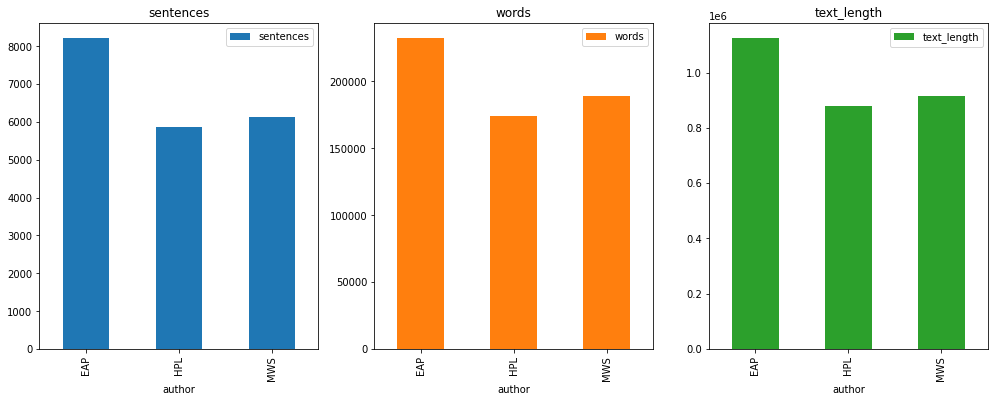

In [ ]:
text_info.plot.bar(subplots = True, layout=(1,3), figsize=(17,6))
plt.show()

In [ ]:
stop_words = set(stopwords.words('english')).union(set([',','.','?','!',':',';',"'",'"','-',"''"]))
author_dict = {'EAP': 0, 'HPL': 1, 'MWS': 2}

In [ ]:
new_text = []
new_author = []
for i, row in train[['text','author']].iterrows():
  word_tokens = word_tokenize(row['text'])
  new_text.append(" ".join([w for w in word_tokens if not w in stop_words]))
  new_author.append(author_dict[row['author']])
new_train = pd.DataFrame(data={'text': new_text, 'author': new_author})

In [ ]:
new_test_text = []
for i, row in test[['text']].iterrows():
  word_tokens = word_tokenize(row['text'])
  new_test_text.append(" ".join([w for w in word_tokens if not w in stop_words]))
new_test = pd.DataFrame(data={'text': new_text})

In [ ]:
X = new_train['text']
y = new_train['author']
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=random_state)
X_test = new_test['text']

In [ ]:
X_train.head()

5985     Should one wish purchase inquire price article...
1497     He said person apparently great haste demanded...
11425    But still remained burning determination reach...
5444     A letter may compressed thin spiral roll diffe...
10930    He discoursed much beyond doubt learnedly I ha...
Name: text, dtype: object

In [ ]:
y_train.head()

5985     0
1497     0
11425    1
5444     0
10930    0
Name: author, dtype: int64

In [ ]:
X_valid.head()

8333     I know I lost sensation chains darkness object...
9497     It permitted tell waking earth self real self ...
10984    For centuries lofty battlements frowned upon w...
10423    They looked like strips torn thorn bush foot g...
9267        It occurred bandage surcingle enveloped unique
Name: text, dtype: object

In [ ]:
y_valid.head()

8333     2
9497     1
10984    1
10423    0
9267     0
Name: author, dtype: int64

In [ ]:
X_test.head()

0    This process however afforded means ascertaini...
1        It never occurred fumbling might mere mistake
2    In left hand gold snuff box capered hill cutti...
3    How lovely spring As looked Windsor Terrace si...
4    Finding nothing else even gold Superintendent ...
Name: text, dtype: object